# Multiple Subplots

# 多個子圖表

> Sometimes it is helpful to compare different views of data side by side.
To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure.
These subplots might be insets, grids of plots, or other more complicated layouts.
In this section we'll explore four routines for creating subplots in Matplotlib.

在一些情況中，如果能將不同的數據圖表並列展示，對於我們進行數據分析和比較會很有幫助。 Matplotlib提供了*子圖表*的概念來實現這一點：單個圖表中可以包括一組小的axes用來展示多個子圖表。這些子圖表可以是插圖，網格狀分佈或其他更複雜的佈局。

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-white')

> A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

Matplotlib 有兩套接口：一套是很方便的 MATLAB Style 接口，還有一套是更強大的Object-oriented 接口。我們在這裡簡單的介紹一下它們的區別。

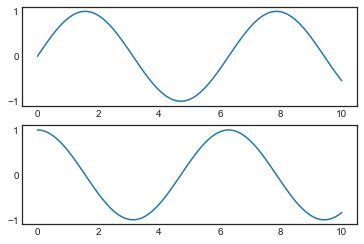

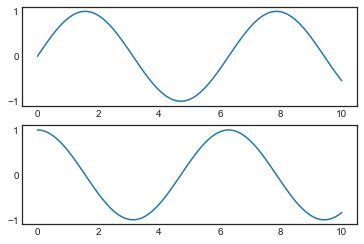

In [2]:
x = np.linspace(0, 10, 100)
plt.figure() 

# MATLAB-style Interface  創建上面第一行的子圖表 - 創建下面第二行的子圖表
plt.subplot(2, 1, 1) 
plt.plot(x, np.sin(x))
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

# Object-oriented interface   首先創建兩個子圖表- fig是兩個子Figure對象，ax是兩個子Axes對象 - 做圖
fig, ax = plt.subplots(2)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

## Vertically Stacked Axes 垂直堆疊的子圖表
> The equivalent of command within the object-oriented interface is ``fig.add_axes()``. Let's use this to create two vertically stacked axes:

與上述等價的面向對象接口的語法是`fig.add_axes()`。我們使用這個方法來創建兩個垂直堆疊的子圖表：

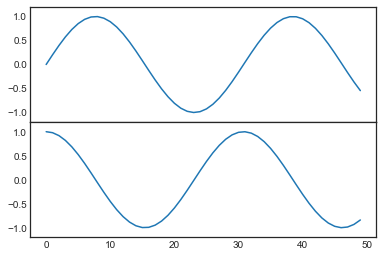

In [3]:
fig = plt.figure() # 獲得figure對象
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],ylim=(-1.2, 1.2)) 
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## `plt.subplot`：簡單網格的子圖表

> Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

將子圖表的行與列對齊是一個很常見的需求，因此Matplotlib提供了一些簡單的函數來實現它們。這些函數當中最底層的是`plt.subplot()`，它會在網格中創建一個子圖表。函數接受三個整數參數，網格行數，網格列數以及該網格子圖表的序號（從左上角向右下角遞增）：

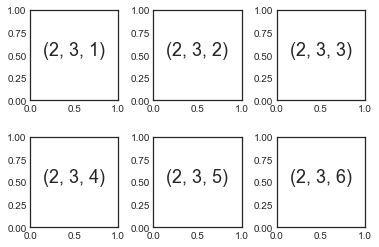

In [4]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 調整這些子圖表之間的距離 high,width 40%

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)        # 2x3 面向對象接口 , i =index
    ax.text(0.5, 0.5, str((2, 3, i)),fontsize=18, ha='center')

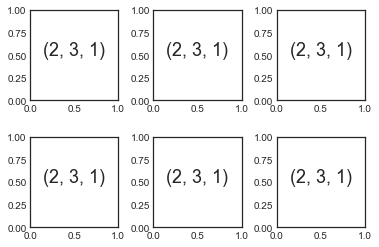

In [5]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)  #擴大間距

for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5,0.5, str((2,3,1)),fontsize=18, ha='center')

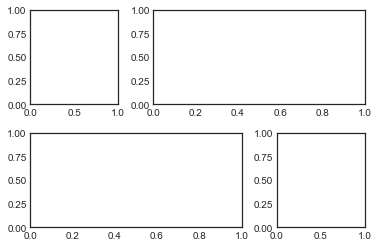

In [6]:
grid = plt.GridSpec(2,3,wspace=0.4,hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

## `plt.subplots`：一句代碼設置所有網格子圖表

> The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

上面的方法當我們需要創建大量的子圖表網格時會變得非常冗長乏味，特別是如果我們需要將內部圖表x軸和y軸標籤隱藏的情況下。因此，`plt.subplots`在這種情況下是一個合適的工具（注意末尾有個s）。這個函數會一次性創建所有的網格子圖表，而不是單個網格，並將它們在一個NumPy數組中返回。參數是行數和列數，還有兩個可選的關鍵字參數`sharex`和`sharey`，可以讓你指定不同子圖表之間的關聯。

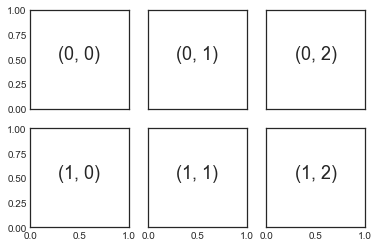

In [7]:
#subplot+s , 創建 2×3 網格的子圖，其中每行的子圖表共享它們的xy軸
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')  

for i in range(2):   #text
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),fontsize=18, ha='center')

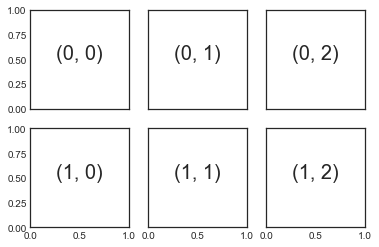

In [8]:
fig, ax = plt.subplots(2,3,sharex='col',sharey='row')
    
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i,j)),fontsize = 20, ha="center")

## ``plt.axes``: Subplots by Hand 手動構建子圖表

> For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

例如，我們可以在距離左邊和底部65%的位置，以插圖的形式放置一個寬度和高度都是20%子圖表，上述數值應該為`[0.65, 0.65, 0.2, 0.2]`：

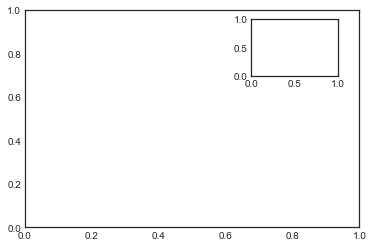

In [9]:
ax1 = plt.axes()  # 標準圖表
ax2 = plt.axes([0.65,0.65,0.2,0.2]) #子圖表 [left, bottom, width, height]`（取值都是0-1)

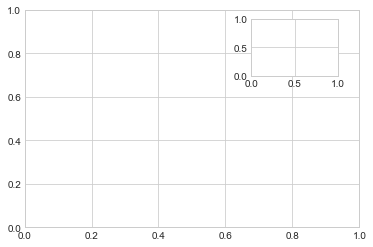

In [10]:
plt.style.use('seaborn-whitegrid')
ax1 = plt.axes()
ax2 = plt.axes([0.65,0.65,0.2,0.2])

## ``plt.GridSpec``: More Complicated Arrangements

## `plt.GridSpec`：更複雜的排列

> To go beyond a regular grid to subplots that span multiple rows and columns, ``plt.GridSpec()`` is the best tool.
The ``plt.GridSpec()`` object does not create a plot by itself; it is simply a convenient interface that is recognized by the ``plt.subplot()`` command.
For example, a gridspec for a grid of two rows and three columns with some specified width and height space looks like this:

當你需要子圖表在網格中佔據多行或多列時，`plt.GridSpec()`正是你所需要的。 `plt.GridSpec()`對象並不自己創建圖表；它只是一個可以被傳遞給`plt.subplot()`的參數。例如，一個兩行三列並帶有指定的寬度高度間隔的gridspec可以如下創建：

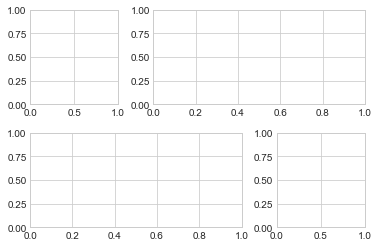

In [11]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

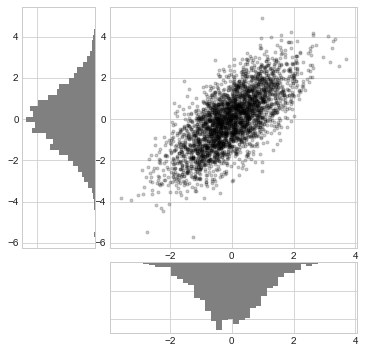

In [13]:
# 使用GridSpec創建網格並加入子圖表
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)


# 構建二維正態分佈數據
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T


main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)   # 在主圖表中繪製散點圖
x_hist.hist(x, 40, histtype='stepfilled',orientation='vertical'  ,color='gray') # 直方圖倒轉y軸方向
x_hist.invert_yaxis() 
y_hist.hist(y, 40, histtype='stepfilled',orientation='horizontal',color='gray') # 直方圖倒轉x軸方向
y_hist.invert_xaxis() 

## Example: Effect of Holidays on US Births

## 例子：節假日對美國出生率的影響

> Let's return to some data we worked with earler, in ["Example: Birthrate Data"](03.09-Pivot-Tables.ipynb#Example:-Birthrate-Data), where we generated a plot of average births over the course of the calendar year; as already mentioned, that this data can be downloaded at https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv.

本例中的數據是前面章節我們已經用過的（參見["例子：出生率"](03.09-Pivot-Tables.ipynb#Example:-Birthrate-Data)），當時我們對年內的平均出生數據創建了一個圖表；就像前面已經提到的，這個數據可以在 https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv 下載。

In [3]:
births = pd.read_csv('input/pd-births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_1806/3857523672.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


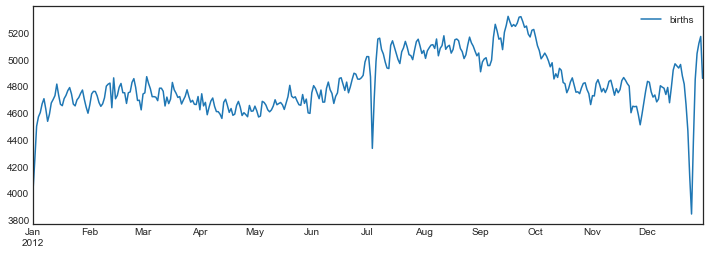

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

> When we're communicating data like this, it is often useful to annotate certain features of the plot to draw the reader's attention.
This can be done manually with the ``plt.text``/``ax.text`` command, which will place text at a particular x/y value:

當我們繪製了這樣的圖表來表達數據時，如果我們能對一些圖表的特性作出標註來吸引讀者的注意力通常是非常有幫助的。這可以通過調用`plt.text`或`ax.text`函數來實現，它們可以在某個特定的x，y軸位置輸出一段文字：

NameError: name 'mpl' is not defined

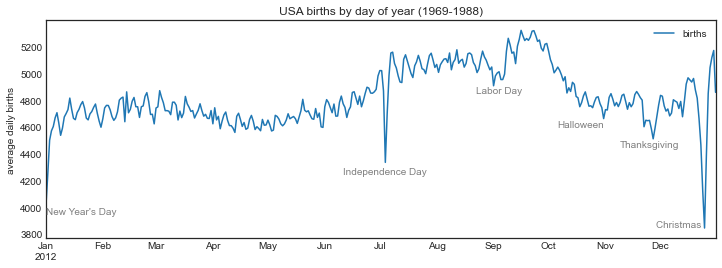

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在折線的特殊位置標註文字
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# 設置標題和y軸標籤
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# 設置x軸標籤月份居中
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

> The ``ax.text`` method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.
Here we used ``ha='right'`` and ``ha='center'``, where ``ha`` is short for *horizonal alignment*.
See the docstring of ``plt.text()`` and of ``mpl.text.Text()`` for more information on available options.

`ax.text`方法接收x位置、y位置、一個字符串和額外可選的關鍵字參數可以用來設置顏色、大小、樣式、對齊等文本格式。上面我們使用了`ha='right'`和`ha='center'`，這裡的`ha`是*hirizonal alignment（水平對齊）*的縮寫。要查閱更多的可用參數，請查看`plt.text()`和`mpl.text.Text()`的文檔字符串內容。

## Transforms and Text Position

## 轉換和文本位置

> In the previous example, we have anchored our text annotations to data locations. Sometimes it's preferable to anchor the text to a position on the axes or figure, independent of the data. In Matplotlib, this is done by modifying the *transform*.The average user rarely needs to worry about the details of these transforms, but it is helpful knowledge to have when considering the placement of text on a figure. There are three pre-defined transforms that can be useful in this situation:

在剛才的例子中，我們將文字標註根據數據位置進行了定位。有些時候我們需要將文字標註獨立於數據位置而根據圖表位置進行定位。 Matplotlib通過*轉換*完成這項工作。一般來說，用戶很少需要關注這些轉換的細節，但是當考慮將文本在圖表上展示時，這些知識卻比較有用。在這種情況中，下面三種定義好的轉換是比較有用的：

- `ax.transData`：與數據坐標相關的轉換
- `ax.tranAxes`：與Axes尺寸相關的轉換（單位是axes的寬和高）
- `ax.tranFigure`：與figure尺寸相關的轉換（單位是figure的寬和高）

> Any graphics display framework needs some scheme for translating between coordinate systems.
For example, a data point at $(x, y) = (1, 1)$ needs to somehow be represented at a certain location on the figure, which in turn needs to be represented in pixels on the screen.
Mathematically, such coordinate transformations are relatively straightforward, and Matplotlib has a well-developed set of tools that it uses internally to perform them (these tools can be explored in the ``matplotlib.transforms`` submodule).

任何的圖形顯示框架都需要在坐標系統之間進行轉換的機制。例如，一個數據點位於$(x, y) = (1, 1)$被轉換為圖表中的某個位置，進而轉換為屏幕上顯示的像素。這樣的坐標轉換在數學上都相對來說比較直接，，而且Matplotlib提供了一系列的工具實現了轉換（這些工具可以在`matplotlib.transforms`模塊中找到）。

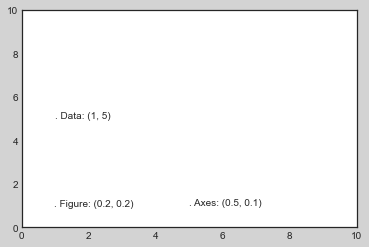

In [6]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

> Note that by default, the text is aligned above and to the left of the specified coordinates: here the "." at the beginning of each string will approximately mark the given coordinate location.

注意默認情況下，文字是在指定坐標位置靠左對齊的：這裡每個字符串開始的"."的位置就是每種轉換的坐標位置。

> The ``transData`` coordinates give the usual data coordinates associated with the x- and y-axis labels.
The ``transAxes`` coordinates give the location from the bottom-left corner of the axes (here the white box), as a fraction of the axes size.
The ``transFigure`` coordinates are similar, but specify the position from the bottom-left of the figure (here the gray box), as a fraction of the figure size.

`transData`坐標給定的是通常使用的x和y軸坐標位置。 `transAxes`坐標給定的是從axes左下角開始算起（白色區域）的坐標位置，使用的是寬度和長度的佔比。 `transFigure`坐標類似，給定的是從figure左下角開始算起（灰色區域）的坐標位置，使用的也是寬度和長度的佔比。

> Notice now that if we change the axes limits, it is only the ``transData`` coordinates that will be affected, while the others remain stationary:

因此如果我們改變了軸的最大長度，只有`transData`坐標會收到影響，其他兩個還是保持在相同位置：

In [ ]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## Arrows and Annotation

## 箭頭和標註

> Drawing arrows in Matplotlib is often much harder than you'd bargain for.
While there is a ``plt.arrow()`` function available, I wouldn't suggest using it: the arrows it creates are SVG objects that will be subject to the varying aspect ratio of your plots, and the result is rarely what the user intended.
Instead, I'd suggest using the ``plt.annotate()`` function.
This function creates some text and an arrow, and the arrows can be very flexibly specified.

在Matplotlib中繪製箭頭通常比你想像的難得多。雖然有`plt.arrow()`函數，作者不建議使用它：這個函數繪製的箭頭是一個SVG對象，因此在圖表使用不同的比例的情況會產生問題，結果通常不能讓用戶滿意。因此，作者建議使用`plt.annotate()`函數。這個函數會繪製一些文字以及一個箭頭，並且箭頭可以非常靈活的進行配置。

In [ ]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

> The arrow style is controlled through the ``arrowprops`` dictionary, which has numerous options available.
These options are fairly well-documented in Matplotlib's online documentation, so rather than repeating them here it is probably more useful to quickly show some of the possibilities.
Let's demonstrate several of the possible options using the birthrate plot from before:

箭頭的樣式是使用`箭頭屬性`字典值進行控制的，裡面有很多可用的參數。這些參數在Matplotlib的在線文檔中已經有了很詳細的說明，因此在這裡就不將這部分內容重複介紹一遍了。我們在前面出生率圖上再使用一些參數進行更多的說明：

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 為圖表添加標註
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# 設置圖表標題和坐標軸標記
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# 設置月份坐標居中顯示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

> You'll notice that the specifications of the arrows and text boxes are very detailed: this gives you the power to create nearly any arrow style you wish.
Unfortunately, it also means that these sorts of features often must be manually tweaked, a process that can be very time consuming when producing publication-quality graphics!
Finally, I'll note that the preceding mix of styles is by no means best practice for presenting data, but rather included as a demonstration of some of the available options.

上圖中箭頭和文字框都非常詳盡了：可以看出你幾乎可以使用`plt.annotate`創建任何你想要的箭頭樣式。不幸的是，這意味著這種特性都需要手工進行調整，因此如果需要獲得印刷質量的圖像，這將是一個非常耗費時間的工作。最後，必須指出，上述這種多種樣式混合的方式來展現數據肯定不是最佳實踐，這裡只是為了盡可能多的介紹可用的參數。

> More discussion and examples of available arrow and annotation styles can be found in the Matplotlib gallery, in particular the [Annotation Demo](http://matplotlib.org/examples/pylab_examples/annotation_demo2.html).

更多關於Matplotlib的箭頭和標註樣式的討論和例子可以訪問Matplotlib gallery，特別是[標註演示](http://matplotlib.org/examples/pylab_examples/annotation_demo2.html)。

# Customizing Ticks

# 自定義刻度

## Major and Minor Ticks

## 主要的和次要的刻度

> Within each axis, there is the concept of a *major* tick mark, and a *minor* tick mark. As the names would imply, major ticks are usually bigger or more pronounced, while minor ticks are usually smaller. By default, Matplotlib rarely makes use of minor ticks, but one place you can see them is within logarithmic plots:

在每個坐標軸上，都有*主要的*刻度和*次要的*刻度概念。正如名字指代的，主要刻度通常是大的和更多用到的，而次要刻度通常是小的。默認Matplotlib很少使用次要刻度，但是在對數圖表中我們可能會看到它們：

譯者註：在Matplotlib 2.0之後，當axis的跨度過大時，默認次要刻度將會不再展示，因此，下面的代碼經過了修改，加上了xlim和ylim參數。

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

In [ ]:
ax = plt.axes(xscale='log', yscale='log', xlim=[10e-5, 10e5], ylim=[10e-5, 10e5])
ax.grid();

> We see here that each major tick shows a large tickmark and a label, while each minor tick shows a smaller tickmark with no label.

我們看到每個主要刻度顯示了一個大的標誌和標籤，而每個次要刻度顯示了一個小的刻度標誌沒有標籤。

> These tick properties—locations and labels—that is, can be customized by setting the ``formatter`` and ``locator`` objects of each axis. Let's examine these for the x axis of the just shown plot:

這些刻度屬性，位置和標籤，都可以使用每個軸的`formatter`和`locator`對象進行個性化設置。下面我們來查看一下x軸的相應對象：

In [ ]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [ ]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

> We see that both major and minor tick labels have their locations specified by a ``LogLocator`` (which makes sense for a logarithmic plot). Minor ticks, though, have their labels formatted by a ``NullFormatter``: this says that no labels will be shown.

我們看到主要和次要刻度的位置都是使用`LogLocator`來設置的（對於對數圖表來說那是理所當然的）。然而次要刻度的標籤的格式是`NullFormatter`：這表示次要刻度不會顯示標籤。

譯者註：新版Matplotlib已經修改，可以看到Formatter都統一成為了LogFormatterSciNotation，再根據圖表實際情況選擇是否展示標籤。

## Hiding Ticks or Labels

## 隱藏刻度和標籤

> Perhaps the most common tick/label formatting operation is the act of hiding ticks or labels.
This can be done using ``plt.NullLocator()`` and ``plt.NullFormatter()``, as shown here:

也許最常見的刻度/標籤格式設置的操作是隱藏刻度或標籤。這可以通過使用`plt.NullLocator()`和`plt.NullFormatter()`來設置，如下例：

In [ ]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

> Notice that we've removed the labels (but kept the ticks/gridlines) from the x axis, and removed the ticks (and thus the labels as well) from the y axis.
Having no ticks at all can be useful in many situations—for example, when you want to show a grid of images.
For instance, consider the following figure, which includes images of different faces, an example often used in supervised machine learning problems (see, for example, [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)):

注意上圖中我們去除了x軸的標籤（但是保留了刻度或網格線），y軸的刻度和標籤都被去除了。圖表中沒有刻度和標籤在很多情況下很有用，例如，當你希望展示一個圖像的網格。比方說，考慮下面的圖表，包含著不同的頭像，一個很常見的有監督機器學習問題（參見[深入：支持向量機](05.07-Support-Vector-Machines.ipynb)）：

In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

## Reducing or Increasing the Number of Ticks

## 減少或增加刻度的數量

> One common problem with the default settings is that smaller subplots can end up with crowded labels.
We can see this in the plot grid shown here:

默認設置的一個常見問題是當子圖表較小時，刻度標籤可能會粘在一起。我們可以從下面例子看到：

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

> Particularly for the x ticks, the numbers nearly overlap and make them quite difficult to decipher.
We can fix this with the ``plt.MaxNLocator()``, which allows us to specify the maximum number of ticks that will be displayed.
Given this maximum number, Matplotlib will use internal logic to choose the particular tick locations:

特別是x軸，標籤的數字就快重疊在一起了，這讓這些標籤難以認清。我們可以通過`plt.MaxNLocator()`來修正這點，用它可以設置最大展示刻度的數量。 Matplotlib會自己計算按照這個最大數量計算的刻度位置：

In [ ]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

## Fancy Tick Formats

## 複雜的刻度格式

> Matplotlib's default tick formatting can leave a lot to be desired: it works well as a broad default, but sometimes you'd like do do something more.
Consider this plot of a sine and a cosine:

Matplotlib的默認刻度格式只能在很多常見情況下工作良好，但是在特殊情況下你會希望能夠更多的進行個性化。考慮下面的正弦和余弦圖表：

In [ ]:
# 繪製正弦和余弦圖表
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# 設置網格、圖例和軸極限
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

> There are a couple changes we might like to make. First, it's more natural for this data to space the ticks and grid lines in multiples of $\pi$. We can do this by setting a ``MultipleLocator``, which locates ticks at a multiple of the number you provide. For good measure, we'll add both major and minor ticks in multiples of $\pi/4$:

這裡有幾個我們希望進行的改變。首先，如果刻度的間距和網格線是$\pi$的倍數會顯得更加自然。我們可以通過`MultipleLocator`來設置它，這個對像用來設置刻度的配置。為了更直觀，我們設置主要刻度為$\frac{\pi}{2}$位置，設置次要刻度為$\frac{\pi}{4}$位置：

In [ ]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

> But now these tick labels look a little bit silly: we can see that they are multiples of $\pi$, but the decimal representation does not immediately convey this.
To fix this, we can change the tick formatter. There's no built-in formatter for what we want to do, so we'll instead use ``plt.FuncFormatter``, which accepts a user-defined function giving fine-grained control over the tick outputs:

但是上圖看起來有點傻：我們可以看出刻度確實是$\pi$的倍數，但是使用了小數的展示讓它們看起來很奇怪。要修正這些標籤，我們需要修改刻度的formatter。在這種情況中，沒有內建的formatter可以給我們使用，因此我們使用`plt.FuncFormatter`，這個對象能夠接受一個用戶自定義的函數來提供對於刻度標籤的精細控制：

In [ ]:
def format_func(value, tick_number):
    # N是pi/2的倍数
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0" # 0点
    elif N == 1:
        return r"$\frac{\pi}{2}$" # pi/2
    elif N == 2:
        return r"$\pi$" # pi
    elif N % 2 > 0:
        return r"$\frac{{%d}\pi}{2}$" %N # n*pi/2 n是奇数
    else:
        return r"${0}\pi$".format(N // 2) # n*pi n是整数

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

> This is much better! Notice that we've made use of Matplotlib's LaTeX support, specified by enclosing the string within dollar signs. This is very convenient for display of mathematical symbols and formulae: in this case, ``"$\pi$"`` is rendered as the Greek character $\pi$.

上圖看起來好多了。注意到我們使用到了Matplotlib的LaTeX支持，使用美元符號將LaTeX字符串括起來。這是用來展示數學符號和公式的簡便方法：在這個例子中``"$\pi$"``被渲染成希臘字母$\pi$。

> The ``plt.FuncFormatter()`` offers extremely fine-grained control over the appearance of your plot ticks, and comes in very handy when preparing plots for presentation or publication.

`plt.FuncFomatter()`提供了對於圖表刻度最高級的自定義和精細控制，並且當你需要創建需要印刷或出版的圖表時非常方便。

## Summary of Formatters and Locators

## Formatter 和 Locator 總結

> We've mentioned a couple of the available formatters and locators.
We'll conclude this section by briefly listing all the built-in locator and formatter options. For more information on any of these, refer to the docstrings or to the Matplotlib online documentaion.
Each of the following is available in the ``plt`` namespace:

我們已經介紹了一些formatter和locator。在最後我們通過將內建的locator和formatter參數列出來對本節做一個總結。要獲得更多相關內容，請參閱文檔或Matplotlib的在線文檔。下表中列出的對像在`plt`命名空間中都是有效的：

Locator對象        | 描述
---------------------|-------------
``NullLocator``      | 無刻度
``FixedLocator``     | 固定刻度位置
``IndexLocator``     | 序號圖表刻度 (例如x = range(len(y)))
``LinearLocator``    | 從最小到最大值的均勻分割刻度
``LogLocator``       | 從最小到最大值的對數分割刻度
``MultipleLocator``  | 某個基數的倍數刻度
``MaxNLocator``      | 刻度數量最大值
``AutoLocator``      | 默認的刻度數量最大值
``AutoMinorLocator`` | 默認的次要刻度

Formatter對象       | 描述
----------------------|---------------
``NullFormatter``     | 無標籤
``IndexFormatter``    | 從一個列表獲得標籤
``FixedFormatter``    | 從固定的字符串設置標籤
``FuncFormatter``     | 使用自定義函數設置標籤
``FormatStrFormatter``| 使用一個格式化字符串設置標籤
``ScalarFormatter``   | 默認的標量標籤
``LogFormatter``      | 默認的對數標籤

# Customizing Matplotlib: Configurations and Stylesheets

# 自定義matplotlib：配置和样式單

## Plot Customization by Hand

## 手動圖表配置

> Through this chapter, we've seen how it is possible to tweak individual plot settings to end up with something that looks a little bit nicer than the default.
It's possible to do these customizations for each individual plot.
For example, here is a fairly drab default histogram:

通過本節學習，我們會看到可以對每個獨立的圖表配置進行配置，直至展現的內容能夠比默認樣式要好。例如下面是一個很普通的默認直方圖：

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

In [ ]:
x = np.random.randn(1000)
plt.hist(x);

In [ ]:
# 使用灰色背景
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# 網格線使用白色實線
plt.grid(color='w', linestyle='solid')

# 隱藏axes的邊框線
for spine in ax.spines.values():
    spine.set_visible(False)
    
# 隱藏頂部和右邊的刻度
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# 淡化刻度和標籤
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# 設置直方的顏色和邊緣色
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

## Changing the Defaults: ``rcParams``

## 改變默認的 `rcParams`

> Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.
This configuration can be adjusted at any time using the ``plt.rc`` convenience routine.
Let's see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

每次Matplotlib加載時，都會對繪製的每個圖表元素載入默認的樣式設置。這個配置可以在任何時候使用`plt.rc`來進行調整。讓我們試著修改rc的參數來讓我們繪製的圖表類似上面的效果。

> We'll start by saving a copy of the current ``rcParams`` dictionary, so we can easily reset these changes in the current session:

首先我們備份`rcParams`字典值，這樣能允許我們方便的重置配置。

In [ ]:
IPython_default = plt.rcParams.copy()

> Now we can use the ``plt.rc`` function to change some of these settings:

下面我們可以使用`plt.rc`函數來改變配置了：

In [ ]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [ ]:
plt.hist(x);

In [ ]:
for i in range(4):
    plt.plot(np.random.rand(10))

> I find this much more aesthetically pleasing than the default styling.
If you disagree with my aesthetic sense, the good news is that you can adjust the rc parameters to suit your own tastes!
These settings can be saved in a *.matplotlibrc* file, which you can read about in the [Matplotlib documentation](http://Matplotlib.org/users/customizing.html).
That said, I prefer to customize Matplotlib using its stylesheets instead.

作者認為這比默認樣式要美觀的多。如果你不同意作者的審美觀，你仍然可以調整rc參數來滿足你自己的品味。這些配置可以保存在一個*.matplotlibrc*文件中，你可以在[Matplotlib個性化文檔](http://Matplotlib.org/users/customizing.html)中查閱相關說明。上面例子表明，使用Matplotlib自己的樣式單進行個性化是更好的方式。

## Stylesheets

## 樣式單

> Even if you don't create your own style, the stylesheets included by default are extremely useful.
The available styles are listed in ``plt.style.available``—here I'll list only the first five for brevity:

即使你不創建自己的樣式，預設的樣式單也非常有用。所有預設的樣式可以使用`plt.style.available`列出，為了頁面簡短下面代碼僅列出前5個：

In [ ]:
plt.style.available[:5]

> The basic way to switch to a stylesheet is to call

切換樣式單最基本的操作是

``` python
plt.style.use('stylename')
```

> But keep in mind that this will change the style for the rest of the session!
Alternatively, you can use the style context manager, which sets a style temporarily:

需要提醒的是這樣做會改變整個會話後面所有的Matplotlib樣式。當然你可以使用Python的with關鍵字和样式的上下文來臨時使用某個樣式單：

``` python
with plt.style.context('stylename'):
    make_a_plot()
```

In [ ]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

In [ ]:
# 恢复默认值
plt.rcParams.update(IPython_default);

In [ ]:
hist_and_lines()

### FiveThiryEight style
> The ``fivethirtyeight`` style mimics the graphics found on the popular [FiveThirtyEight website](https://fivethirtyeight.com).
As you can see here, it is typified by bold colors, thick lines, and transparent axes:

`fivethirtyeight`樣式模擬了流行的[fivethirtyeight](https://fivethirtyeight.com)的圖像樣式。正如你下面所見，它使用了前衛的顏色，粗線條和透明axes：

In [ ]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

> The ``ggplot`` package in the R language is a very popular visualization tool.
Matplotlib's ``ggplot`` style mimics the default styles from that package:

R語言中的`ggplot`包在數據科學可視化中非常受歡迎。 Matplotlib的`ggplot`模擬了這個樣式：

In [ ]:
with plt.style.context('ggplot'):
    hist_and_lines()

### *Bayesian Methods for Hackers( style

### 黑客的貝葉斯方法 樣式

> There is a very nice short online book called [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/); it features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually-appealing style throughout the book.
This style is reproduced in the ``bmh`` stylesheet:

有一本非常優秀的在線短篇書籍叫做[*黑客的概率編程和貝葉斯方法*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)；書中展示的圖表是使用Matplotlib創建的，這些圖表使用了一套非常美觀和優秀的rc參數配置，並在整本書中保持了一致。 Matplotlib中用`bmh`樣式單模擬了這本書的樣式配置：

In [ ]:
with plt.style.context('bmh'):
    hist_and_lines()

In [ ]:
#Dark background
with plt.style.context('dark_background'):
    hist_and_lines()

In [ ]:
#Grayscale
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn style

> Matplotlib also has stylesheets inspired by the Seaborn library (discussed more fully in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
As we will see, these styles are loaded automatically when Seaborn is imported into a notebook.
I've found these settings to be very nice, and tend to use them as defaults in my own data exploration.

Matplotlib也有受到Seaborn庫啟發的樣式單（詳見[使用Seaborn進行可視化](04.14-Visualization-With-Seaborn.ipynb)）。正如我們下面看到的，當你將Seaborn載入notebook的時候，這些樣式會自動被裝載。作者發現這些配置非常有用，並經常作為默認的樣式使用。

In [ ]:
import seaborn
hist_and_lines()

## Creating Figures and Subplots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
fig = plt.figure(figsize = (3,2))  # blank plot
ax1 = fig.add_subplot(2,2,1)

In [ ]:
fig = plt.figure(figsize = (6,4)) # blank plot: big:8*6  small:6*4 

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot([1,2,3,4,5])
ax2.plot(np.random.randn(20).cumsum())

We can adjust the spaces around the subplot by using these arguments:

**hspace(wspace)** : to adjust the **height(width)** between the subplots

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (8,6))
ax[0,0].plot([1,2,3,4,5])
ax[2,2].plot([1,2,3,4,5])
fig.subplots_adjust(hspace=.4, wspace =0.4)  # adjust distance of each

## Changing Colors, Markers and Linestyle

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

y = np.random.randn(20).cumsum()
plt.plot(y)

In [ ]:
x= np.arange(0,200,10)
plt.plot(x,y)

In [ ]:
plt.plot(x,y, color = 'r')
plt.plot(x,y, color = 'y')
plt.plot(x,y, color = 'g')

In [ ]:
plt.plot(x,y, color = 'green', marker = 'o')
plt.plot(x,y, color = 'green', marker = 's')
plt.plot(x,y, color = 'green', marker = 'v')

In [ ]:
plt.plot(x,y, color = 'green', marker = 'v', linestyle = '--' )
plt.plot(x,y, color = 'green', marker = 'v', linestyle = ':' )

## Customizing Ticks and labels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.random.randn(200).cumsum()
fig, ax = plt.subplots(1,1)
ax.plot(data)

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(data)
ticks = ax.set_xticks(range(0,200,50))
#ticks = ax.set_xticks([0,50,100,150,200])

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(data)
ticks = ax.set_xticks([0,50,100,150, 200])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'])

ax.set_xlabel('Cumulative Sum')
ax.set_ylabel('Values')
ax.set_title('Cumulative Sum for Random Numbers')

## 13.5 Adding Legends

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data1 = np.random.randn(200).cumsum()
data2 = np.random.randn(200).cumsum()

In [ ]:
fig, ax  =plt.subplots(1,1)
ax.plot(data1)
ax.plot(data2)

In [ ]:
#To add a legend, first we need to add a label for each plot using the argument **label = ' '**:
fig, ax  =plt.subplots(1,1)
ax.plot(data1, label = 'data1')
ax.plot(data2, label = 'data2')
ax.legend()
#ax.legend(loc = 'best')   (upper right) (upper left) (lower right) (lower left) 

## Adding Texts and Arrows on a Plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0,10,0.1)
y = np.sin(x)

In [ ]:
fig, ax  = plt.subplots(1,1)
ax.plot(x,y)

In [ ]:
fig, ax  = plt.subplots(1,1)
ax.plot(x,y) 

ax.text(4,0.7,'y = sin(x)', fontsize = 15)
ax.text(0.5,0.5,'y = sin(x)', fontsize = 15,transform=ax.transAxes)

ax.arrow(0.5,1, 0.6,0, width = 0.05)
ax.arrow(6.8,1, 0.6,0, width = 0.05)

In [ ]:
fig, ax  = plt.subplots(1,1)
ax.plot(x,y) 
ax.text(0.35,0.8,'Wave Length', fontsize = 15,transform=ax.transAxes)
ax.arrow(1.8,1, 2.5,0, width = 0.05)
ax.arrow(7.8,1, -2.5,0, width = 0.05)

##  Adding Annotations and Drawings on a Plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(6)
y = np.array([23,34,65,78,51,55])

fig, ax = plt.subplots(1,1)
ax.plot(x, y, 'ko--')

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(x, y, 'ko--')
ax.annotate('Maximum', xy = (x[3], y[3]), xytext =(3, 50),arrowprops = dict(facecolor ='green', shrink = 0.1))

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(x, y, 'ko--')
ax.annotate('Maximum', xy = (x[3], y[3]), xytext =(3, 50),
            arrowprops = dict(facecolor ='green', shrink = 0.1))
ax.annotate('Minimum', xy = (x[0], y[0]), xytext =(0, 50),
            arrowprops = dict(facecolor ='green', shrink = 0.1))

In [ ]:
fig, ax = plt.subplots(1,1)

circle = plt.Circle((0.5, 0.5), 0.2, fc='y')
ax.add_patch(circle)

rect = plt.Rectangle((0.3, 0.5), 0.5, 0.2, color='y', alpha= 0.5)
ax.add_patch(rect)

tri = plt.Polygon([[0.25, 0.25], [0.55, 0.5], [0.4, 0.7]], color='g', alpha=0.5)
ax.add_patch(tri)

## Saving Plots to File

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(6)
y = np.array([23,34,65,78,51,55])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, 'ko--')
ax.set_title('My First Figure')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')

#plt.savefig('output.png')

# working with multiple figures and axes

In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
# The subplot() command specifies numrows, numcols, 
# fignum where fignum ranges from 1 to numrows*numcols.
plt.subplot(211)
plt.grid()
plt.plot(t1, f(t1), 'b-')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

In [ ]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])

plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title
plt.show()

In [ ]:
fig , ax = plt.subplots(2, 3, 
                        sharex=True, sharey=True)  #sharex:共享x軸  # sharey:共享y軸


for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),   #在各個子網格寫上文字
                      fontsize=18, 
                      ha='center')
        

In [ ]:
data = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
print(data)

plt.subplot(data[:,0])   #all row, 0 column
plt.subplot(data[0, 1:]) #0 row, 1之後的所有column
plt.subplot(data[1, 1])  #1 row, 1 column
plt.subplot(data[1, 2])  #1 row, 2 column

<!--NAVIGATION-->
< [自定义颜色条](04.07-Customizing-Colorbars.ipynb) | [目录](Index.ipynb) | [文本和标注](04.09-Text-and-Annotation.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.08-Multiple-Subplots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
